In [1]:
import pandas as pd
import numpy as np
import glob
import warnings
from bs4 import BeautifulSoup
from urllib.request import urlopen
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
website_df = pd.read_csv("../../ds5500-userprivacy/data/OPP-115/documentation/websites_opp115.csv")

In [4]:
website_final = website_df[['Site Human-Readable Name', 'Policy UID', 'Sectoral Data']]

In [5]:
website_final['sector'] = website_final['Sectoral Data'].str.split(":").str[0]
website_final.drop("Sectoral Data",axis = 1, inplace = True)
website_final.head()

,Site Human-Readable Name,Policy UID,sector
0,The Atlantic,20,Arts
1,IMDb,21,Kids and Teens
2,New York Times,26,Society
3,The Verge,32,Home
4,NBC Universal,33,Kids and Teens


### Load annotations data

In [6]:
dfs = []
for fname in glob.glob(r'../../ds5500-userprivacy/data/OPP-115/annotations/*.csv'):   
    policy_id = fname.split('\\')[-1].split('_')[0]
    df = pd.read_csv(fname, header=None, usecols=[3,4,5,6], names=['policy_id', 'segment_id', 'category_name', 'attr_val'])
    df['policy_id_website'] = policy_id
    dfs.append(df)
final_df = pd.concat(dfs, ignore_index=True)

In [7]:
final_df.head()

,policy_id,segment_id,category_name,attr_val,policy_id_website
0,3828,0,Other,"{""Other Type"": {""endIndexInSegment"": 575, ""sta...",../../ds5500-userprivacy/data/OPP-115/annotati...
1,3828,1,First Party Collection/Use,"{""Collection Mode"": {""endIndexInSegment"": -1, ...",../../ds5500-userprivacy/data/OPP-115/annotati...
2,3828,1,First Party Collection/Use,"{""Collection Mode"": {""endIndexInSegment"": -1, ...",../../ds5500-userprivacy/data/OPP-115/annotati...
3,3828,1,First Party Collection/Use,"{""Collection Mode"": {""endIndexInSegment"": -1, ...",../../ds5500-userprivacy/data/OPP-115/annotati...
4,3828,1,First Party Collection/Use,"{""Collection Mode"": {""endIndexInSegment"": -1, ...",../../ds5500-userprivacy/data/OPP-115/annotati...


### Load Raw Privacy Policy data

In [9]:
html = open(r"../../ds5500-userprivacy/data/OPP-115/sanitized_policies/20_theatlantic.com.html").read()
soup = BeautifulSoup(html, features="html.parser")
print(soup.get_text())

 Privacy Policy     Effective: January 1, 2015    At the Atlantic Monthly Group, Inc. ("The Atlantic"), we want you to enjoy and benefit from our websites and online services secure in the knowledge that we have implemented fair information practices designed to protect your privacy. Our privacy policy is applicable to The Atlantic, and The Atlantics affiliates and subsidiaries whose websites, mobile applications and other online services are directly linked (the Sites). The privacy policy describes the kinds of information we may gather during your visit to these Sites, how we use your information, when we might disclose your personally identifiable information, and how you can manage your information.  |||This privacy policy does not apply to Sites maintained by other companies or organizations to which we may link or who may link to us. We are not responsible for the actions and privacy policies of third party websites.  |||By visiting our Sites, you are accepting the practices desc

In [10]:
policy_lst = []
for fname in glob.glob(r'../../ds5500-userprivacy/data/OPP-115/sanitized_policies/*.html'):  
    policy_id = fname.split('\\')[-1].split('_')[0]
    html = open(fname).read()
    soup = BeautifulSoup(html, features="html.parser")
    soup_text = soup.get_text()
    policy_lst.append([policy_id, soup_text])
policy_df = pd.DataFrame(policy_lst, columns = ['policy_id', 'policy_text'])

In [11]:
policy_df.head()

,policy_id,policy_text
0,../../ds5500-userprivacy/data/OPP-115/sanitized,"Privacy Policy Last Modified: March 25, 2013..."
1,../../ds5500-userprivacy/data/OPP-115/sanitized,Welcome to the Google Privacy Policy When ...
2,../../ds5500-userprivacy/data/OPP-115/sanitized,Web Privacy Statement |||Austin Community C...
3,../../ds5500-userprivacy/data/OPP-115/sanitized,Privacy Policy |||PBS is committed to protect...
4,../../ds5500-userprivacy/data/OPP-115/sanitized,"Privacy, Security, and Accessibility Policies ..."


### Checking Missing Values

In [12]:
website_final.isnull().sum()

Site Human-Readable Name    0
Policy UID                  0
sector                      1
dtype: int64

In [13]:
website_final[website_final['sector'].isnull()]

,Site Human-Readable Name,Policy UID,sector
67,Earth Kam,907,NaN


In [14]:
# Adding missing value based on website description
website_final.loc[website_final['Policy UID'] == 907, "sector"] = "Science"

In [15]:
website_final['sector'].value_counts(dropna = False)

Regional          14
Business          14
Arts              12
Kids and Teens     9
Health             8
Computers          8
News               7
Home               7
Society            6
Recreation         6
Games              5
Science            5
Reference          5
Sports             4
Shopping           3
World              2
Name: sector, dtype: int64

In [16]:
final_df.isnull().sum()

policy_id            0
segment_id           0
category_name        0
attr_val             0
policy_id_website    0
dtype: int64

In [17]:
policy_df.isnull().sum()

policy_id      0
policy_text    0
dtype: int64

### Basic Plotting

#### Plot 1: Different Categories in Data

Text(0.5, 0, 'Policy Count')

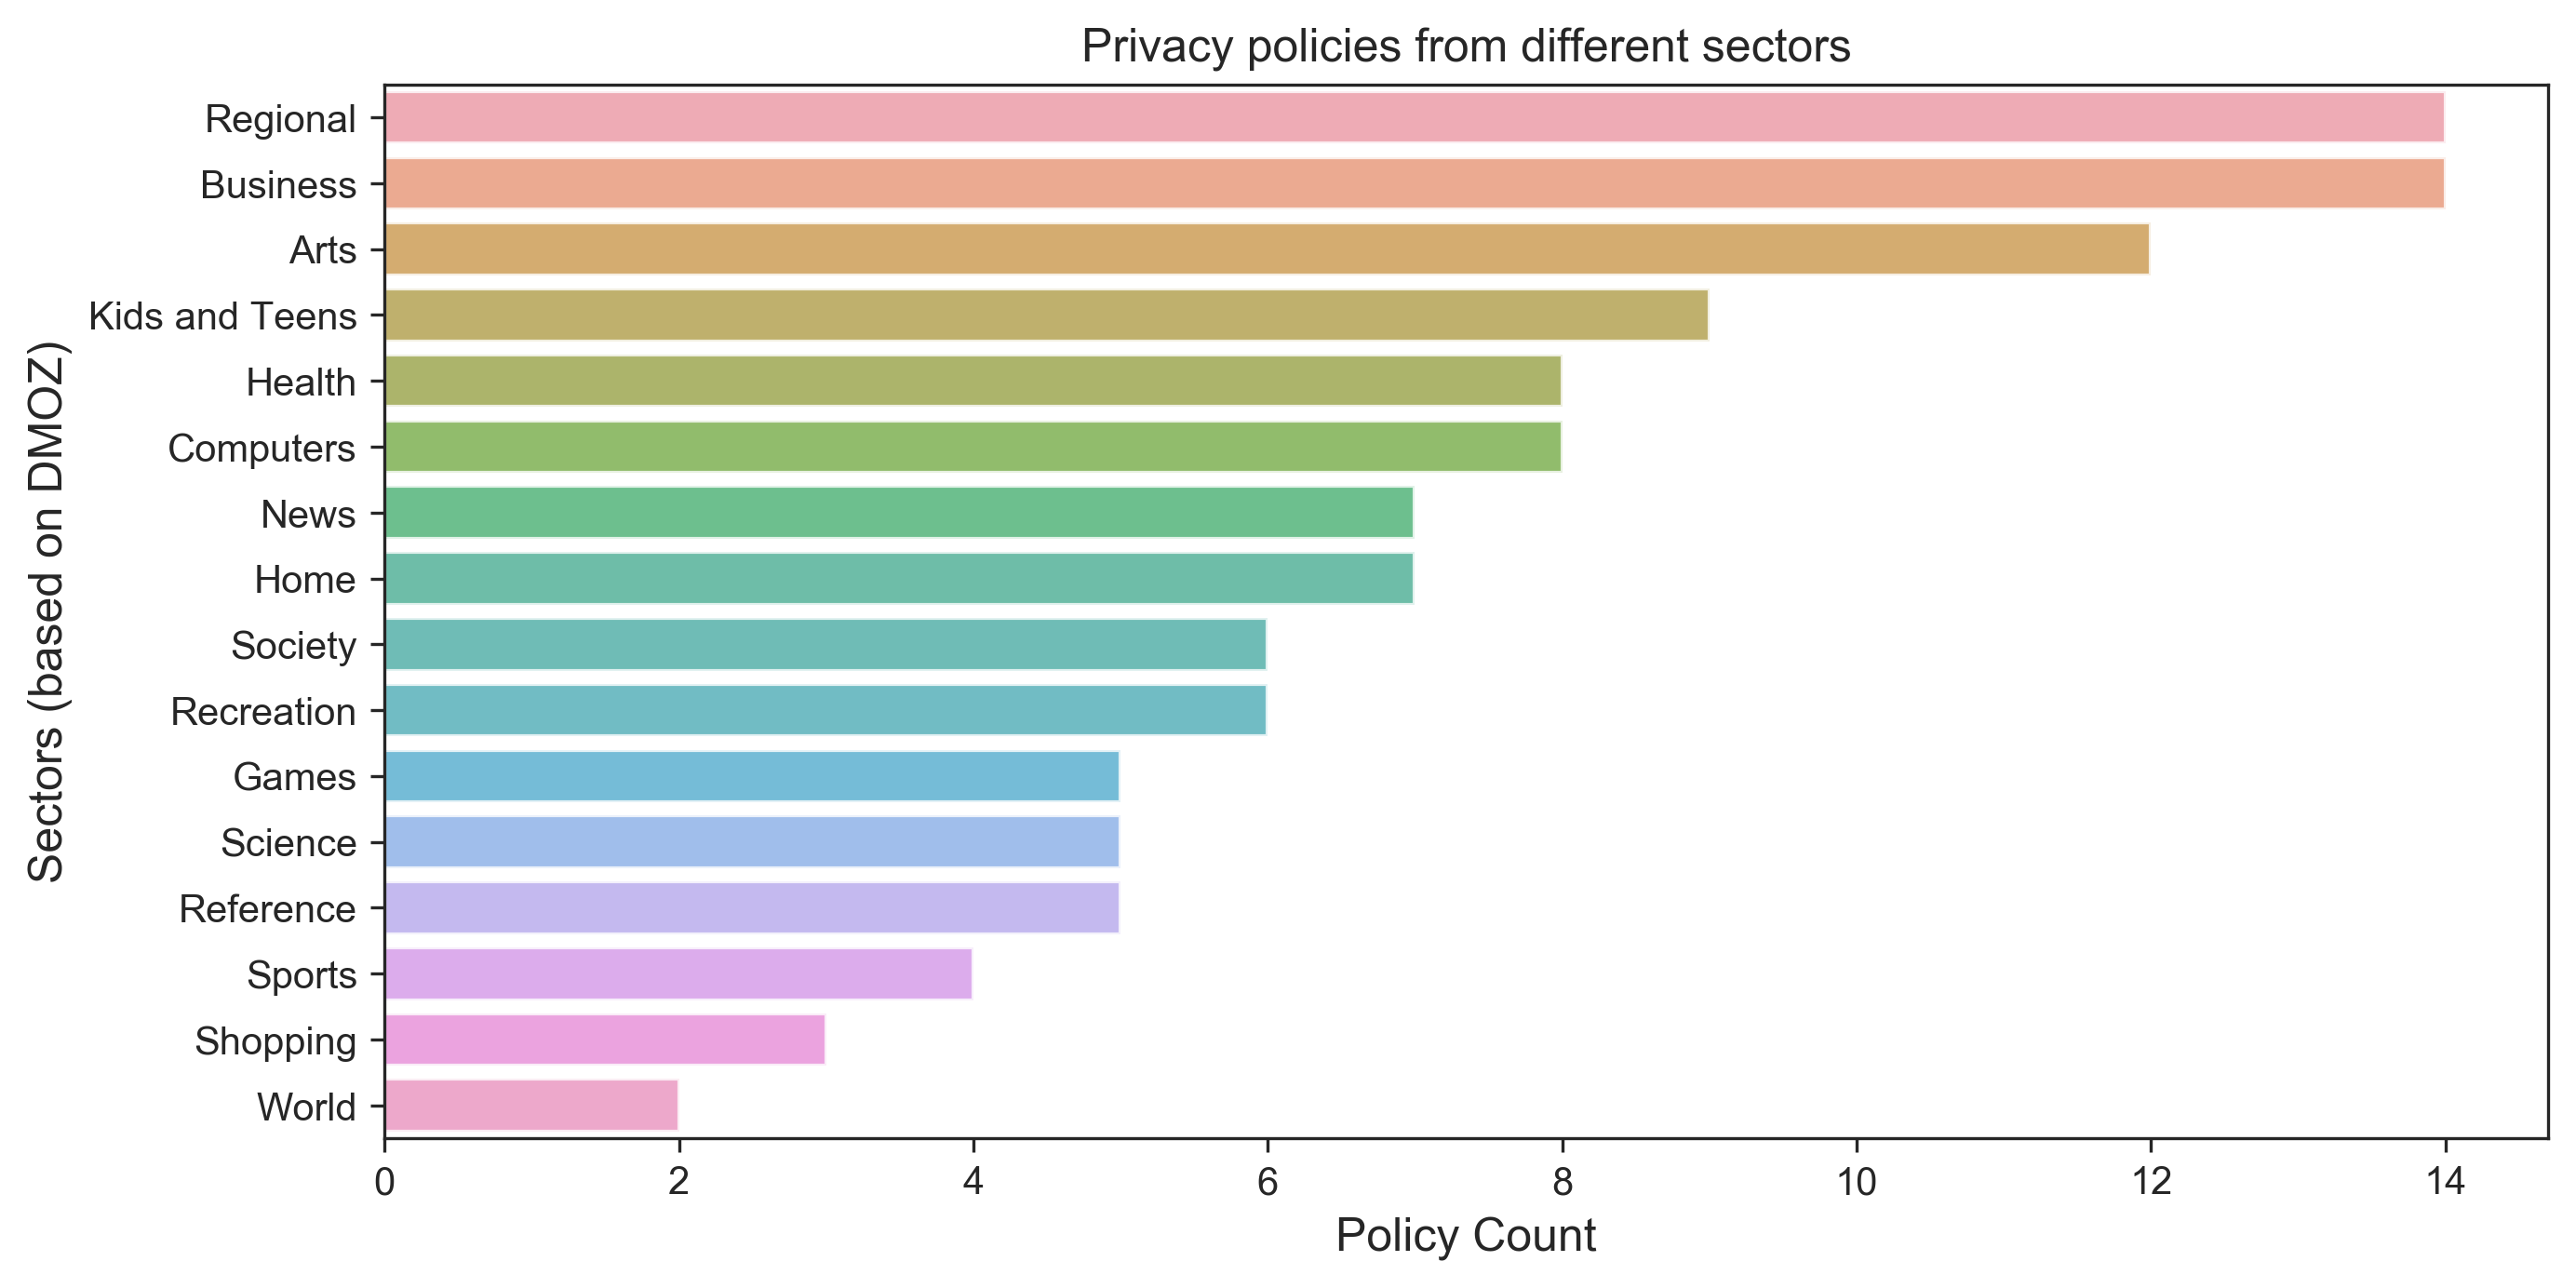

In [42]:
sns.set_style(style="whitegrid")
sns.set_style("ticks")

sector_count  = website_final['sector'].value_counts()
plt.figure(figsize=(10,5), dpi=300)
sns.barplot(sector_count.values, sector_count.index, alpha=0.8)
plt.title('Privacy policies from different sectors')
plt.ylabel('Sectors (based on DMOZ)', fontsize=12)
plt.xlabel('Policy Count', fontsize=12)

#### Plot 2: Frequency of each labelled class 

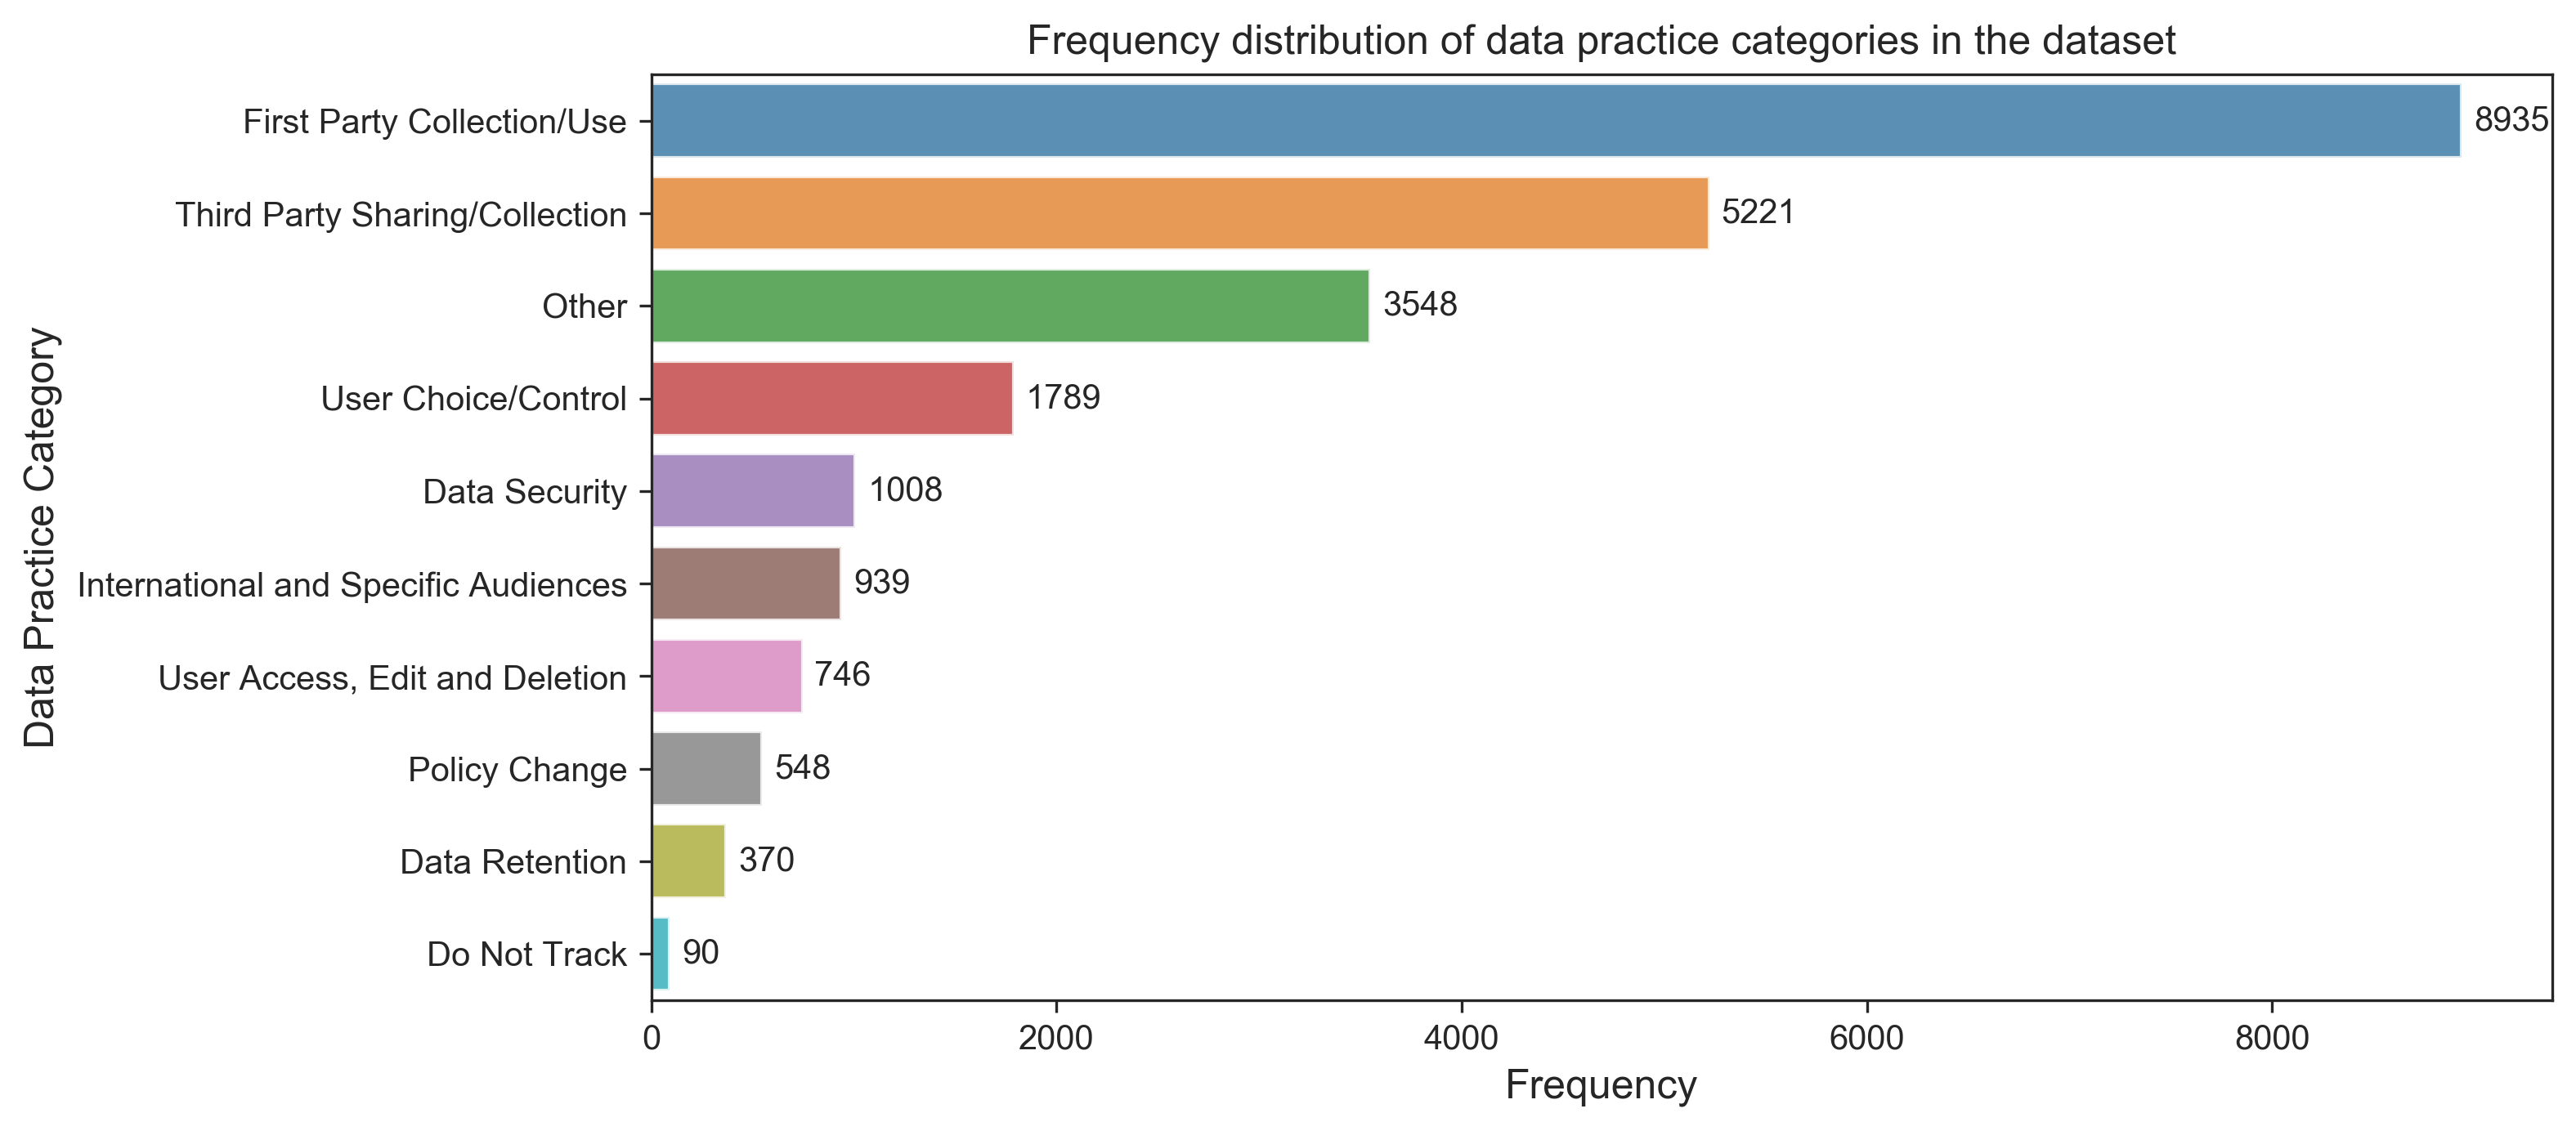

In [43]:
label_count  = final_df['category_name'].value_counts()
plt.figure(figsize=(10,5), dpi=300)
ax = sns.barplot(label_count.values, label_count.index, alpha=0.8)
plt.title('Frequency distribution of data practice categories in the dataset')
plt.ylabel('Data Practice Category', fontsize=12)
plt.xlabel('Frequency', fontsize=12)

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 60
    _y = p.get_y() + p.get_height() - 0.3
    value = int(p.get_width())
    ax.text(_x, _y, value, ha="left")

#### Plot 3: Labelled category boxplot

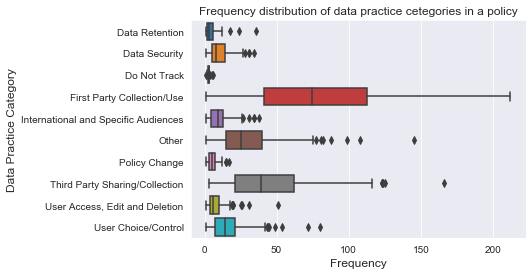

In [47]:
label_dist = final_df.groupby(['category_name','policy_id_website'])['category_name'].count().reset_index(name="count")

sns.boxplot(x="count", y="category_name", data=label_dist, orient="h")
plt.title('Frequency distribution of data practice cetegories in a policy')
plt.ylabel('Data Practice Category', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.savefig('3.png', dpi=300, bbox_inches='tight')

#### Percentage of Labelled Category Per Policy

In [32]:
percentage_cat = round((y['category_name'].value_counts()/len(final_df['policy_id_website'].unique()))*100,2)
plt.figure(figsize=(10,5), dpi=300)
ax = sns.barplot(percentage_cat.values, percentage_cat.index, alpha=0.8)
plt.title('Percentage of Data Practice present in total Policies')
plt.ylabel('Data Practice', fontsize=12)
plt.xlabel('Percentage', fontsize=12)

for p in ax.patches:
    _x = p.get_x() + p.get_width() + 0.4
    _y = p.get_y() + p.get_height() - 0.3
    value = float(p.get_width())
    ax.text(_x, _y, value, ha="left")

NameError: name 'y' is not defined

#### Plot 4: Data Practices per Policy

In [36]:
grouped_df = final_df.groupby('policy_id_website')['category_name'].count().reset_index()

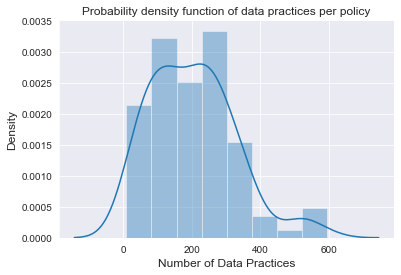

In [45]:
sns.set_style(style="darkgrid")
sns.distplot(grouped_df['category_name'])
plt.title('Probability density function of data practices per policy')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Number of Data Practices', fontsize=12)
plt.savefig('4.png', dpi=300, bbox_inches='tight')

#### Plot 5: Text Length Distribution 

In [38]:
policy_df['word_count'] = policy_df['policy_text'].apply(lambda x : len(x.split()))

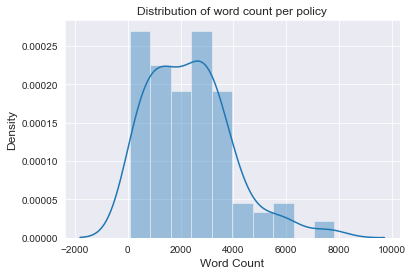

In [46]:
sns.set_style(style="darkgrid")
sns.distplot(policy_df['word_count'])
plt.title('Distribution of word count per policy')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.savefig('5.png', dpi=300, bbox_inches='tight')